In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

In [29]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_raw = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(data_raw.shape, target.shape)

(506, 13) (506,)


In [30]:
#relevant_idx = [4,5,10,12]

#data = data_raw[:,relevant_idx]

m, n = data_raw.shape

shuffle = np.arange(m)
np.random.shuffle(shuffle)
print(target.shape)

data = data_raw[shuffle]
target = target[shuffle]

slice = int(.75*m)

Xtrain = data[:slice,:]
ytrain = target[:slice]

Xtest = data[slice:,:]
ytest = target[slice:]

mu = np.mean(Xtrain, axis=0)
std = np.std(Xtrain, axis=0)

Xtrain = (Xtrain - mu)/std
Xtest = (Xtest - mu)/std


(506,)


In [28]:
def scheduler(epoch, lr):
  if epoch == 100:
    return lr/3
  else:
    return lr


callbacks_list=[
    tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=0
    )
]

In [31]:
model = tf.keras.models.Sequential()
opt = tf.keras.optimizers.SGD(learning_rate=.003)
model.add(tf.keras.layers.Dense(1, input_shape=(n,), activation='linear', use_bias=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(opt, loss=tf.keras.losses.MSE)

In [33]:
history = model.fit(Xtrain, ytrain, epochs=200, callbacks=callbacks_list, validation_data=(Xtest, ytest), verbose=2)

Epoch 1/200
12/12 - 1s - loss: 548.7166 - val_loss: 528.4413 - lr: 0.0030 - 805ms/epoch - 67ms/step
Epoch 2/200
12/12 - 0s - loss: 466.3872 - val_loss: 455.4838 - lr: 0.0030 - 55ms/epoch - 5ms/step
Epoch 3/200
12/12 - 0s - loss: 401.1613 - val_loss: 396.9586 - lr: 0.0030 - 57ms/epoch - 5ms/step
Epoch 4/200
12/12 - 0s - loss: 348.2422 - val_loss: 348.0514 - lr: 0.0030 - 56ms/epoch - 5ms/step
Epoch 5/200
12/12 - 0s - loss: 303.0377 - val_loss: 306.8813 - lr: 0.0030 - 55ms/epoch - 5ms/step
Epoch 6/200
12/12 - 0s - loss: 264.7108 - val_loss: 271.2871 - lr: 0.0030 - 56ms/epoch - 5ms/step
Epoch 7/200
12/12 - 0s - loss: 231.8949 - val_loss: 240.3986 - lr: 0.0030 - 59ms/epoch - 5ms/step
Epoch 8/200
12/12 - 0s - loss: 203.1100 - val_loss: 213.6947 - lr: 0.0030 - 64ms/epoch - 5ms/step
Epoch 9/200
12/12 - 0s - loss: 178.5647 - val_loss: 190.5442 - lr: 0.0030 - 70ms/epoch - 6ms/step
Epoch 10/200
12/12 - 0s - loss: 157.4022 - val_loss: 170.4311 - lr: 0.0030 - 62ms/epoch - 5ms/step
Epoch 11/200
12/1

dict_keys(['loss', 'val_loss', 'lr'])


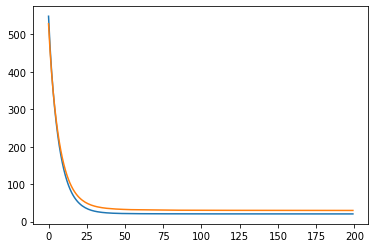

In [34]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
